# Logistic Regression From Scratch

* Logistic regression is the go-to linear classification algorithm for two-class problems.

* Logistic regression is named for the function used at the core of the method, the **logistic function**. The logistic function, also called the **sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. **It's an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1**, but never exactly at those limits.

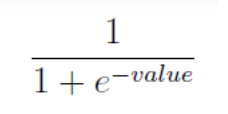

* Where e is the base of the **natural logarithms (Euler's number)** and value is the actual numerical value that you want to transform.

## Calculate Prediction

* Logistic regression uses an equation as the representation, very much like linear regression. Input values (x) are combined linearly using weights or coefficient values to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

* Below is an example logistic regression equation:

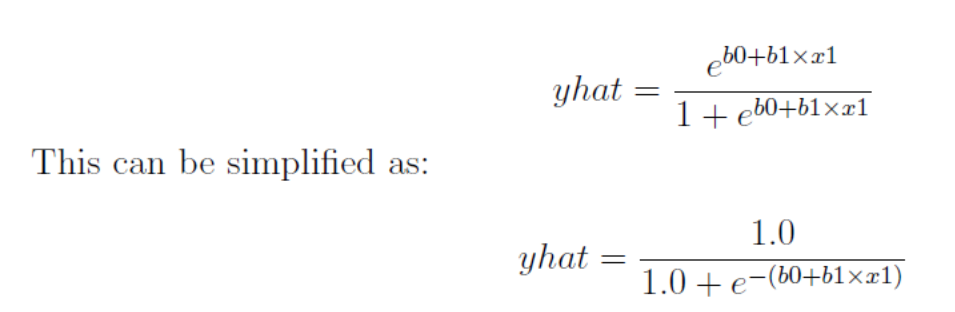

* Where yhat is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x).

In [16]:
from math import exp
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

## Calculate New Coefficients using Stochastic Gradient Descent

* Logistic Regression uses gradient descent to update the coefficients. We can calculate the new coefficient values using a simple update equation.

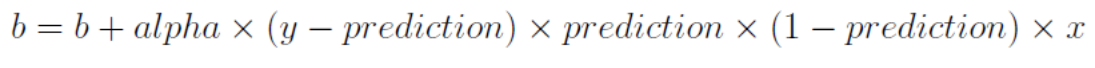

* Where b is the coeffcient we are updating and prediction is the output of making a prediction using the model. **Alpha** is a parameter that you must specify at the beginning of the training run. This is the learning rate and controls how much the coefficients (and therefore the model) changes or learns each time it is updated. **Alpha's good values might be in the range 0.1 to 0.3**. You will notice that the last term in the equation is x, this is the input value for the coefficient.

In [17]:
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(X_train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(X_train[0]))]
    for _ in range(n_epoch):
        for row in X_train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

In [29]:
# Logistic Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(X_train, X_test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(X_train, l_rate, n_epoch)
    for row in X_test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)

In [19]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("Data/pima-indians-diabetes.csv", names=column_names)

In [21]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
X = df.drop('class', axis=1)
y = df['class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
l_rate = 0.1
n_epoch = 100

In [30]:
predicted = logistic_regression(X_train, X_test,l_rate, n_epoch)

In [31]:
print (accuracy_score(y_test,predicted))

0.6692913385826772


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
print (accuracy_score(y_test,predictions))

0.7440944881889764
